In [184]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [185]:
train = pd.read_csv("Train and Test with added features andor labels/mimic_synthetic_train_with_added_label_and_features.csv")

In [186]:
test = pd.read_csv("Train and Test with added features andor labels/mimic_synthetic_test._with_features_added.csv")

In [187]:
len(train.columns) # One extra column of the labels in training set

340

In [188]:
len(test.columns)

339

In [189]:
Gender_mapping={'M':0,'F':1}                       # convert string to numeric
train['GENDER']=train['GENDER'].map(Gender_mapping)
test['GENDER']=test['GENDER'].map(Gender_mapping)

In [190]:
# train['GENDER']

In [191]:
ICU_mapping={'CCU':1, 'MICU':2, 'TSICU':3, 'CSRU':4, 'SICU':5}   # convert string to numeric
train['ICU']=train['ICU'].map(ICU_mapping)
test['ICU']=test['ICU'].map(ICU_mapping)

In [192]:
train.columns[8]
test.columns[8]

'AGE'

In [193]:
train.head()

,ADMITTIME,DISCHTIME,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,GENDER,AGE,HR MIN DAY1,...,Othereyedx,Otitismedia,Dizziness,Othereardx,Othnervdx,Hrtvalvedx,Carditis,HTN,Htncomplicn,Dead
0,2128 05 15 23 42 00,2132 07 23 15 00 00,Private,ENGL,CATHOLIC,DIVORCED,WHITE,1.0,21.0,57.207630,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2134 03 17 03 59 00,2113 03 06 12 05 00,Private,ENGL,UNOBTAINABLE,SINGLE,WHITE,0.0,39.0,79.331400,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2164 04 05 17 32 00,2180 09 20 16 30 00,Medicaid,SPAN,CATHOLIC,WIDOWED,OTHER,0.0,40.0,118.230290,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2102 09 08 00 58 00,2166 06 26 15 30 00,Medicare,ENGL,NOT SPECIFIED,MARRIED,WHITE,0.0,75.0,83.780380,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2163 08 06 12 07 00,2147 01 14 18 40 00,Medicare,ENGL,UNOBTAINABLE,MARRIED,UNKNOWN/NOT SPECIFIED,1.0,55.0,60.878613,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [194]:
test.head()

,ADMITTIME,DISCHTIME,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,GENDER,AGE,HR_MIN_DAY1,...,Eyeinfectn,Othereyedx,Otitismedia,Dizziness,Othereardx,Othnervdx,Hrtvalvedx,Carditis,HTN,Htncomplicn
0,2169-12-28_15:01:00,2127-05-18_19:00:00,Self_Pay,ENGL,OTHER,MARRIED,WHITE,1,18,72.64388,...,0,0,0,0,0,0,0,0,0,0
1,2191-12-30_16:34:00,2117-12-06_14:09:00,Medicare,ENGL,NOT_SPECIFIED,SINGLE,BLACK/AFRICAN_AMERICAN,1,56,66.60985,...,0,0,0,0,0,0,0,0,1,0
2,2110-09-08_16:29:00,2130-12-03_14:18:00,Medicaid,ENGL,CATHOLIC,SINGLE,WHITE,0,32,69.71651,...,0,0,0,0,0,0,0,0,0,0
3,2151-07-20_23:13:00,2158-10-15_15:21:00,Private,ENGL,OTHER,MARRIED,WHITE,0,80,63.28020,...,0,0,0,0,0,0,0,0,0,0
4,2168-11-15_23:41:00,2123-07-23_12:22:00,Medicare,ENGL,JEWISH,WIDOWED,WHITE,0,83,75.22861,...,0,0,0,0,0,0,0,0,0,0


In [195]:
train=train.iloc[:,7:]                                           # Remove non-repeated string data
test=test.iloc[:,7:]

In [196]:
# train = train.iloc[:,1:]
train.head(2)

,GENDER,AGE,HR MIN DAY1,HR MAX DAY1,HR MEAN DAY1,SYS BP MIN DAY1,SYS BP MAX DAY1,SYS BP MEAN DAY1,DIAS BP MIN DAY1,DIAS BP MAX DAY1,...,Othereyedx,Otitismedia,Dizziness,Othereardx,Othnervdx,Hrtvalvedx,Carditis,HTN,Htncomplicn,Dead
0,1.0,21.0,57.20763,108.704030,70.841980,79.84706,119.72417,94.435090,26.880910,68.876540,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,39.0,79.33140,121.138664,96.915726,93.99454,138.59406,113.570206,38.621536,74.270065,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [197]:
# test = test.iloc[:,1:]
test.head(2)

,GENDER,AGE,HR_MIN_DAY1,HR_MAX_DAY1,HR_MEAN_DAY1,SYS_BP_MIN_DAY1,SYS_BP_MAX_DAY1,SYS_BP_MEAN_DAY1,DIAS_BP_MIN_DAY1,DIAS_BP_MAX_DAY1,...,Eyeinfectn,Othereyedx,Otitismedia,Dizziness,Othereardx,Othnervdx,Hrtvalvedx,Carditis,HTN,Htncomplicn
0,1,18,72.64388,112.70850,96.46485,85.319580,121.78375,103.074420,47.445683,79.353836,...,0,0,0,0,0,0,0,0,0,0
1,1,56,66.60985,106.79843,83.84866,92.358284,141.43913,122.410645,38.688465,89.153900,...,0,0,0,0,0,0,0,0,1,0


In [198]:
train['Otnutritdx']=train['Otnutritdx'].astype(float)            # Make string to float type
test['Otnutritdx']=test['Otnutritdx'].astype(float)

In [199]:
train['Othnervdx']=train['Othnervdx'].astype(float)              # Make string to float type
test['Othnervdx']=test['Othnervdx'].astype(float)

In [200]:
for i in train:                                                  # Fill the missing value by mean  
    mean_value=train[i].mean()
    train[i]=train[i].fillna(mean_value)
for i in test:
    mean_value=test[i].mean()
    test[i]=test[i].fillna(mean_value)

In [201]:
len(train.columns)

333

In [202]:
len(test.columns)

332

In [203]:
train_1=train[train['Dead']>0]
train_0_raw=train[train['Dead']<1] 
train_0=train_0_raw.iloc[:2798,:]
train=pd.concat([train_0,train_1])

In [204]:
X = train.iloc[:,:-1]                                           #Train data without output class
Y = train.iloc[:,-1:]                                           # Output class

In [205]:
Y = Y.astype('int')

In [206]:
from imblearn.over_sampling import SMOTE                        # Balance imbalance data
sm = SMOTE(random_state=2)
X, Y = sm.fit_sample(X, np.ravel(Y))
print(sum(Y==0))
print(sum(Y==1))

2799
2799


In [207]:
from sklearn.preprocessing import StandardScaler                #Make standard scale
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
test = sc_X.transform(test)

In [208]:
from sklearn.model_selection import train_test_split            #Split data into train & test data 
x_train, x_test, y_train, y_test = train_test_split(X, Y , test_size = 0.20, random_state = 42)

# Logistic Regression

C:\Users\NAUSHAD\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


64.46


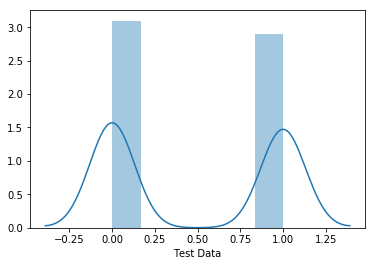

In [209]:
#Logistic Regression
from sklearn.metrics import accuracy_score  
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()                                    #Logistic Regression
logreg.fit(x_train, y_train)
x = pd.Series(y_test, name="Test Data")
ax = sns.distplot(x)
y_pred = logreg.predict(x_test)
acc_logreg = round(accuracy_score(y_pred, y_test) * 100, 2)      # Find Accuracy
print(acc_logreg)

In [210]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(cm)
print(report)

[[385 193]
 [205 337]]
              precision    recall  f1-score   support

           0       0.65      0.67      0.66       578
           1       0.64      0.62      0.63       542

    accuracy                           0.64      1120
   macro avg       0.64      0.64      0.64      1120
weighted avg       0.64      0.64      0.64      1120



In [180]:
# Predicting the output for the test dataset
test_predLR = logreg.predict(test)

C:\Users\NAUSHAD\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


64.64


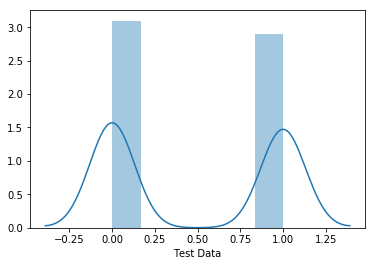

In [211]:
#Linear SVC
from sklearn.metrics import accuracy_score  
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
x = pd.Series(y_test, name="Test Data")
ax = sns.distplot(x)
y_pred = linear_svc.predict(x_test)
acc_logreg = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_logreg)

In [212]:
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(cm)
print(report)

[[386 192]
 [204 338]]
              precision    recall  f1-score   support

           0       0.65      0.67      0.66       578
           1       0.64      0.62      0.63       542

    accuracy                           0.65      1120
   macro avg       0.65      0.65      0.65      1120
weighted avg       0.65      0.65      0.65      1120



In [147]:
# Predicting the output for the test dataset
test_predSVC = linear_svc.predict(test)

In [242]:
#Saving the output csv file to local disk
f = pd.DataFrame(test_pred, index=None)
f.to_csv('aaa/mimic_synthetic_test.csv',index=False)

In [59]:
type(y_pred)
len(list(y_pred))

1120

64.38


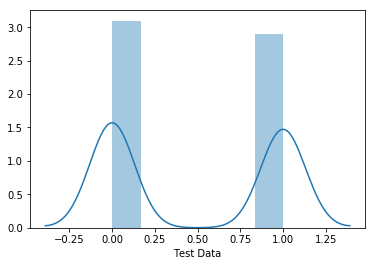

In [213]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest =  RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 0)
randomforest.fit(x_train, y_train)
x = pd.Series(y_test, name="Test Data")
ax = sns.distplot(x)
y_pred = randomforest.predict(x_test)
acc_logreg = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_logreg)

In [214]:
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(cm)
print(report)

[[386 192]
 [207 335]]
              precision    recall  f1-score   support

           0       0.65      0.67      0.66       578
           1       0.64      0.62      0.63       542

    accuracy                           0.64      1120
   macro avg       0.64      0.64      0.64      1120
weighted avg       0.64      0.64      0.64      1120



64.02


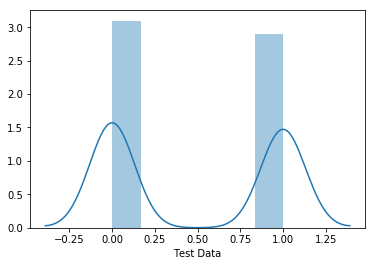

In [215]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
x = pd.Series(y_test, name="Test Data")
ax = sns.distplot(x)
y_pred = gbk.predict(x_test)
acc_logreg = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_logreg)

In [216]:
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(cm)
print(report)

[[379 199]
 [204 338]]
              precision    recall  f1-score   support

           0       0.65      0.66      0.65       578
           1       0.63      0.62      0.63       542

    accuracy                           0.64      1120
   macro avg       0.64      0.64      0.64      1120
weighted avg       0.64      0.64      0.64      1120



C:\Users\NAUSHAD\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=332, units=512, kernel_initializer="uniform")`
  
C:\Users\NAUSHAD\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=1024, kernel_initializer="uniform")`
  import sys
C:\Users\NAUSHAD\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=256, kernel_initializer="uniform")`
  
C:\Users\NAUSHAD\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Users\NAUSHAD\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # Thi

Epoch 1/50
5598/5598 [==============================] - 8s 1ms/step - loss: 0.6609 - acc: 0.6066
Epoch 2/50
5598/5598 [==============================] - 1s 139us/step - loss: 0.6090 - acc: 0.6695
Epoch 3/50
5598/5598 [==============================] - 1s 154us/step - loss: 0.5717 - acc: 0.7015
Epoch 4/50
5598/5598 [==============================] - 1s 147us/step - loss: 0.5331 - acc: 0.7337
Epoch 5/50
5598/5598 [==============================] - 1s 170us/step - loss: 0.4871 - acc: 0.7722
Epoch 6/50
5598/5598 [==============================] - 1s 184us/step - loss: 0.4295 - acc: 0.7992
Epoch 7/50
5598/5598 [==============================] - 1s 160us/step - loss: 0.3937 - acc: 0.8224
Epoch 8/50
5598/5598 [==============================] - 1s 149us/step - loss: 0.3081 - acc: 0.8723
Epoch 9/50
5598/5598 [==============================] - 1s 139us/step - loss: 0.2612 - acc: 0.8887
Epoch 10/50
5598/5598 [==============================] - 1s 158us/step - loss: 0.2332 - acc: 0.9082
Epoch 11/50

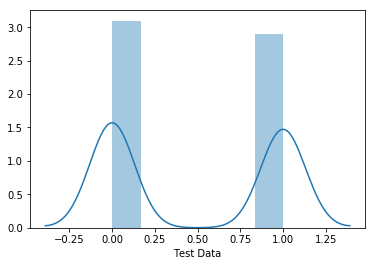

In [218]:
# Deep Neural Network
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()
classifier.add(Dense(output_dim=512,init='uniform',activation='relu',input_dim=332))
classifier.add(Dense(output_dim=1024,init='uniform',activation='relu'))
classifier.add(Dense(output_dim=256,init='uniform',activation='relu'))
classifier.add(Dense(output_dim=1,init='uniform',activation='sigmoid'))
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
classifier.fit(X,Y,batch_size=500,nb_epoch=50)
x = pd.Series(y_test, name="Test Data")
ax = sns.distplot(x)
y_pred = classifier.predict(x_test)
l=[]
for i in range(len(y_pred)) :
    if(y_pred[i]>0.5):
        l.append(1)
    else:
        l.append(0)
j=0
count=0
for i in l :
    if l[j]==y_test[j]:
        count = count+1
    j=j+1
# print(j)
# print(count)
acc_logreg = round(accuracy_score(l, y_test) * 100, 2)
print(acc_logreg)

In [219]:
cm = confusion_matrix(y_test, l)
report = classification_report(y_test, l)
print(cm)
print(report)

[[578   0]
 [  0 542]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       578
           1       1.00      1.00      1.00       542

    accuracy                           1.00      1120
   macro avg       1.00      1.00      1.00      1120
weighted avg       1.00      1.00      1.00      1120



In [223]:
test_pred = classifier.predict(test)
y_pred=[]
for i in range(len(test_pred)) :
    if(test_pred[i]>0.5):
        y_pred.append(1)
    else:
        y_pred.append(0)

In [227]:
y_pred[:10]

[1, 0, 0, 1, 0, 1, 1, 0, 1, 1]